# 1. Import data

In [1]:
import pandas as pd
import numpy as np
from glob import glob


In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [3]:
FOLDER = '/content/drive/MyDrive/Цифровые кафедры/Кейс АБ Тест/Очищенные, поделенные на группы'
file_names = glob(f'{FOLDER}/*.xlsx')
print(file_names)

dfs = [pd.read_excel(fname) for fname in file_names]
df = pd.concat(dfs)

[]


ValueError: No objects to concatenate

# 2. Get Unique Users

In [4]:
# get records from groups A and B
a_records = df[df['class'] == 'A']
b_records = df[df['class'] == 'B']

NameError: name 'df' is not defined

In [5]:
print(a_records.shape, b_records.shape)

NameError: name 'a_records' is not defined

In [ ]:
# get unique users from groups A and B
a_users = pd.unique(a_records['uuid'])
b_users = pd.unique(b_records['uuid'])
print(a_users.shape, b_users.shape)

(98733,) (123648,)


# 3. Get Statistics in numbers

In [ ]:
a_clicks = a_records[a_records['uri'] == '/addbull/'][['uuid', 'uri']]

a_clicks = a_clicks.groupby(by=['uuid']).count()
a_clicks = a_clicks.rename(columns={'uri': 'clicks'})

a_stats = a_clicks.describe()['clicks']
a_stats['sum'] = a_clicks.sum()['clicks']
a_stats = a_stats[['sum', 'count', 'mean', 'std', 'min', 'max']]

In [ ]:
b_clicks = b_records[b_records['uri'] == '/addbull/'][['uuid', 'uri']]

b_clicks = b_clicks.groupby(by=['uuid']).count()
b_clicks = b_clicks.rename(columns={'uri': 'clicks'})

b_stats = b_clicks.describe()['clicks']
b_stats['sum'] = b_clicks.sum()['clicks']
b_stats = b_stats[['sum', 'count', 'mean', 'std', 'min', 'max']]

In [ ]:
gen_stats = pd.DataFrame({
    'A': a_stats,
    'B': b_stats,
})

gen_stats = gen_stats.rename(index = {'sum': 'Кол-во кликов',
                                      'count': 'Кол-во пользователей',
                                      'mean': 'Среднее кол-во нажатий на кнопку',
                                      'std': 'Отклонение',
                                      'min': 'Мин. значение',
                                      'max': 'Макс. значение'
                                      })


print(gen_stats)

                                             A             B
Кол-во кликов                     33142.000000  42164.000000
Кол-во пользователей              20369.000000  25395.000000
Среднее кол-во нажатий на кнопку      1.627080      1.660327
Отклонение                            2.520432      5.753837
Мин. значение                         1.000000      1.000000
Макс. значение                      107.000000    787.000000


In [ ]:
# Get CTR
a_ctr = a_stats['sum'] / len(a_records)
b_ctr = b_stats['sum'] / len(b_records)

print('CTR A:', round(a_ctr, 4))
print('CTR Б:', round(b_ctr, 4))

CTR A: 0.0987
CTR Б: 0.1003


# 4. Get statistics in graphs

<Axes: title={'center': 'Распределение числа пользователей по количеству кликов. Группа А'}, xlabel='Кол-во нажатий на кнопку', ylabel='Кол-во пользователей,нажавших\n на кнопку'>

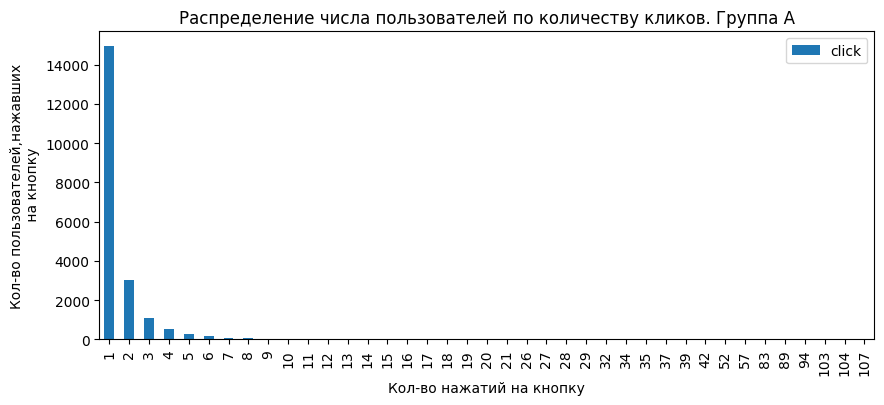

In [ ]:
a_clicks = a_records[a_records['uri'] == '/addbull/'][['uuid', 'uri']]
a_clicks = a_clicks.groupby(by=['uuid']).count()

# Костыль, но работает
a_clicks['click'] = 1
a_clicks = a_clicks.groupby(by=['uri']).count()
a_clicks['index'] = a_clicks.index

# Draw
a_clicks.plot.bar(x='index',
                  y='click',
                  title='Распределение числа пользователей по количеству кликов. Группа А',
                  xlabel='Кол-во нажатий на кнопку',
                  ylabel='Кол-во пользователей,нажавших\n на кнопку',
                  figsize=(10, 4)
)

<Axes: title={'center': 'Распределение числа пользователей по количеству кликов. Группа Б'}, xlabel='Кол-во нажатий на кнопку', ylabel='Кол-во пользователей,нажавших\n на кнопку'>

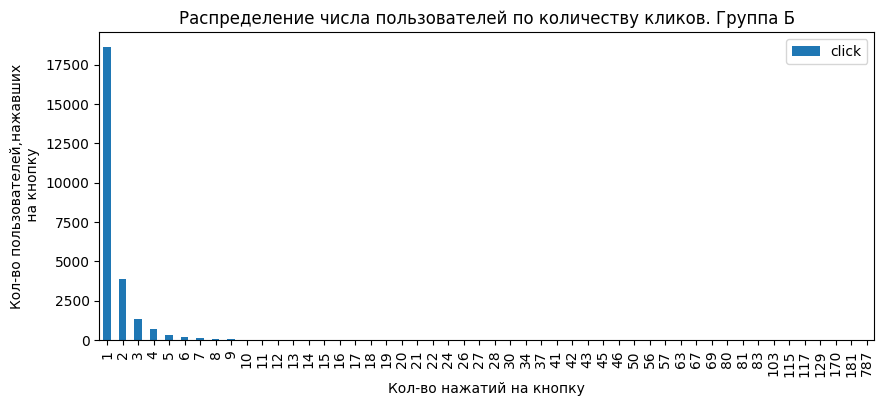

In [ ]:
b_clicks = b_records[b_records['uri'] == '/addbull/'][['uuid', 'uri']]
b_clicks = b_clicks.groupby(by=['uuid']).count()

# Костыль, но работает
b_clicks['click'] = 1
b_clicks = b_clicks.groupby(by=['uri']).count()
b_clicks['index'] = b_clicks.index

# Draw
b_clicks.plot.bar(x='index',
                  y='click',
                  title='Распределение числа пользователей по количеству кликов. Группа Б',
                  xlabel='Кол-во нажатий на кнопку',
                  ylabel='Кол-во пользователей,нажавших\n на кнопку',
                  figsize=(10, 4)
)


In [ ]:
print(a_clicks['click'])
print()
print(b_clicks['click'])

uri
1      14956
2       3043
3       1072
4        510
5        293
6        159
7         85
8         57
9         41
10        38
11        17
12        19
13         6
14        12
15         9
16         9
17         4
18         4
19         3
20         3
21         2
26         2
27         1
28         2
29         3
32         1
34         2
35         1
37         2
39         2
42         1
52         2
57         1
83         1
89         1
94         2
103        1
104        1
107        1
Name: click, dtype: int64

uri
1      18634
2       3863
3       1311
4        675
5        304
6        191
7        117
8         86
9         47
10        30
11        28
12        19
13        12
14        11
15        10
16         2
17         4
18         3
19         5
20         1
21         2
22         3
24         4
26         3
27         2
28         1
30         2
34         2
37         1
41         1
42         1
43         1
45         1
46         1
50         1
56 

In [ ]:
a_clicks.index


Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
             14,  15,  16,  17,  18,  19,  20,  21,  26,  27,  28,  29,  32,
             34,  35,  37,  39,  42,  52,  57,  83,  89,  94, 103, 104, 107],
           dtype='int64', name='uri')

# 5. Для Васи

In [ ]:
A_x = a_clicks.index.tolist()
A_y = a_clicks['click'].values.tolist()

B_x = b_clicks.index.tolist()
B_y = b_clicks['click'].values.tolist()


NameError: ignored

In [ ]:
print(B_x)
print(B_y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 28, 30, 34, 37, 41, 42, 43, 45, 46, 50, 56, 57, 63, 67, 69, 80, 81, 83, 103, 115, 117, 129, 170, 181, 787]
[18634, 3863, 1311, 675, 304, 191, 117, 86, 47, 30, 28, 19, 12, 11, 10, 2, 4, 3, 5, 1, 2, 3, 4, 3, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
A_x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 26, 27, 28, 29, 32, 34, 35, 37, 39, 42, 52, 57, 83, 89, 94, 103, 104, 107]
A_y = [14956, 3043, 1072, 510, 293, 159, 85, 57, 41, 38, 17, 19, 6, 12, 9, 9, 4, 4, 3, 3, 2, 2, 1, 2, 3, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1]

B_x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 28, 30, 34, 37, 41, 42, 43, 45, 46, 50, 56, 57, 63, 67, 69, 80, 81, 83, 103, 115, 117, 129, 170, 181, 787]
B_y = [18634, 3863, 1311, 675, 304, 191, 117, 86, 47, 30, 28, 19, 12, 11, 10, 2, 4, 3, 5, 1, 2, 3, 4, 3, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]



E_1 = 0
for i in range(len(A_x)):
    E_1 = E_1 + A_x[i] * A_y[i]

E_1_int = 0
index_1 = 0
for i in range(len(A_x)):
    E_1_int = E_1_int + A_x[i] * A_y[i]
    if E_1_int >= E_1 * 0.9:
        index_1 = i
        break

E_2 = 0
for l in range(len(B_x)):
    E_2 = E_2 + B_x[l] * B_y[l]

E_2_int = 0
index_2 = 0
for l in range(len(B_x)):
    E_2_int = E_2_int + B_x[l] * B_y[l]
    if E_2_int >= E_2 * 0.9:
        index_2 = l
        break
#в A_x,A_y, B_x,B_y Сделанные данные
A_x = A_x[:index_1]
A_y = A_y[:index_1]

B_x = B_x[:index_2]
B_y = B_y[:index_2]



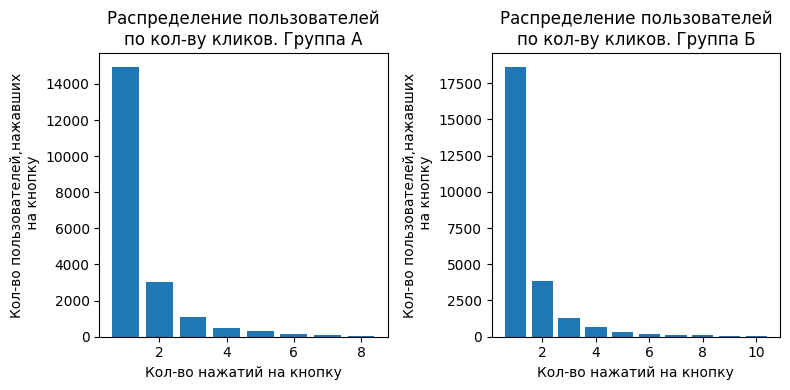

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

A_y = np.array(A_y)
B_y = np.array(B_y)

# Draw histogram
# plt.figure(figsize=(10, 4))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
plt.subplot(121)
plt.title('Распределение пользователей\nпо кол-ву кликов. Группа А')
plt.xlabel('Кол-во нажатий на кнопку')
plt.ylabel('Кол-во пользователей,нажавших\n на кнопку')
plt.bar(A_x, A_y)

plt.subplot(122)
plt.bar(B_x, B_y)
plt.title('Распределение пользователей\nпо кол-ву кликов. Группа Б')
plt.xlabel('Кол-во нажатий на кнопку')
plt.ylabel('Кол-во пользователей,нажавших\n на кнопку')
fig.tight_layout()
plt.show()

In [ ]:
a_clicks = np.sum(A_y * A_x)
a_users = sum(A_y)
a_clicks_avr = a_clicks / a_users
a_clicks_min = np.min(A_x)
a_clicks_max = np.max(A_x)

b_clicks = np.sum(B_y * B_x)
b_users = sum(B_y)
b_clicks_avr = b_clicks / b_users
b_clicks_min = np.min(B_x)
b_clicks_max = np.max(B_x)

num_of_clicks = (a_clicks, b_clicks)
num_of_users = (a_users, b_users)
clicks_avr = (a_clicks_avr, b_clicks_avr)
clicks_min = (a_clicks_min, b_clicks_min)
clicks_max = (a_clicks_max, b_clicks_max)

df_new_stats = pd.DataFrame([
                        num_of_clicks, num_of_users, clicks_avr,
                        clicks_min, clicks_max
                        ],
                        columns = ['A', 'Б'],
                        index = [
                            'Кол-во кликов','Кол-во пользователей',
                            'Среднее кол-во нажатий на кнопку',
                            'Мин. значение',
                            'Макс. значение'
])

df_new_stats, _ = df_new_stats.align(df_new_stats, join="outer", axis=0)
print(df_new_stats)

                                             A             Б
Кол-во кликов                     29768.000000  37889.000000
Кол-во пользователей              20175.000000  25258.000000
Среднее кол-во нажатий на кнопку      1.475489      1.500079
Мин. значение                         1.000000      1.000000
Макс. значение                        8.000000     10.000000


In [ ]:
# Get CTR
a_records = 0.95 * 98733
b_records = 0.95 * 123648

a_ctr = a_clicks / a_records
b_ctr = b_clicks / b_records

print('CTR A:', round(a_ctr, 4))
print('CTR Б:', round(b_ctr, 4))

CTR A: 0.3174
CTR Б: 0.3226


In [ ]:
b_ctr / a_ctr * 100

101.63393094159532